In [1]:
import importlib

packages = ["shap", "xgboost", "joblib", "pandas", "matplotlib", "numpy"]
for pkg in packages:
    found = importlib.util.find_spec(pkg)
    print(f"{pkg}: {'✅ Installed' if found else '❌ Missing'}")


shap: ❌ Missing
xgboost: ✅ Installed
joblib: ✅ Installed
pandas: ✅ Installed
matplotlib: ✅ Installed
numpy: ✅ Installed


In [2]:
!pip install shap


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Administrator\\tf310env\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 544.3/544.3 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 12.9 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.6 MB/s eta 0:00:00
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
     --------------------------------------- 30.3/30.3 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [1]:
import shap
print("✅ SHAP version:", shap.__version__)


✅ SHAP version: 0.48.0


In [2]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load your weighted XGBoost model ===
model_path = r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\xgboost_model_weighted.pkl"
scaler_path = r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\global_scaler_xgb_weighted.pkl"
data_path = r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\preprocessed_dataset_final.csv"

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
df = pd.read_csv(data_path)

# === Separate features and labels ===
X = df.drop("Attack_enc", axis=1)
y = df["Attack_enc"]

# === Apply scaling ===
X_scaled = scaler.transform(X)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


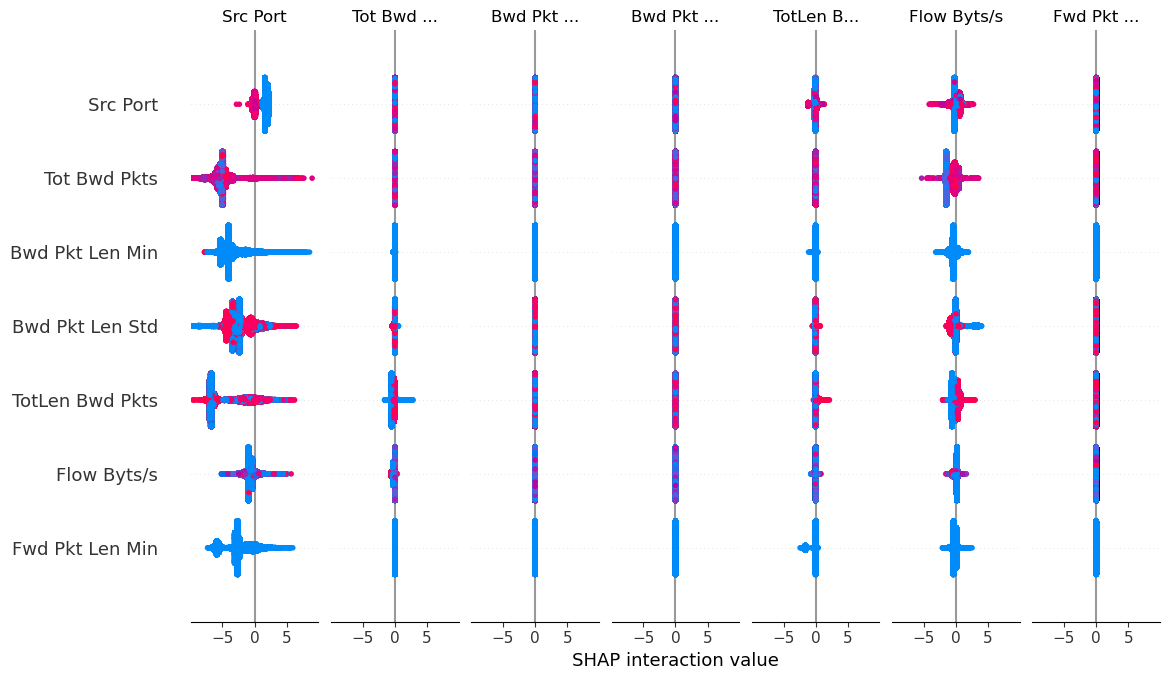

In [4]:
import shap
import matplotlib.pyplot as plt

# Initialize TreeExplainer for XGBoost
explainer = shap.TreeExplainer(model)

# Compute SHAP values (can take ~30–60 sec depending on data size)
shap_values = explainer.shap_values(X_scaled)

# Global summary plot: shows which features impact predictions the most
shap.summary_plot(shap_values, X_scaled, feature_names=X.columns, show=True)


In [8]:
print("shap_values[class_index].shape:", shap_values[14].shape)
print("X_scaled.shape:", X_scaled.shape)
print("Length of feature_names:", len(feature_names))


shap_values[class_index].shape: (63, 18)
X_scaled.shape: (141779, 63)
Length of feature_names: 63


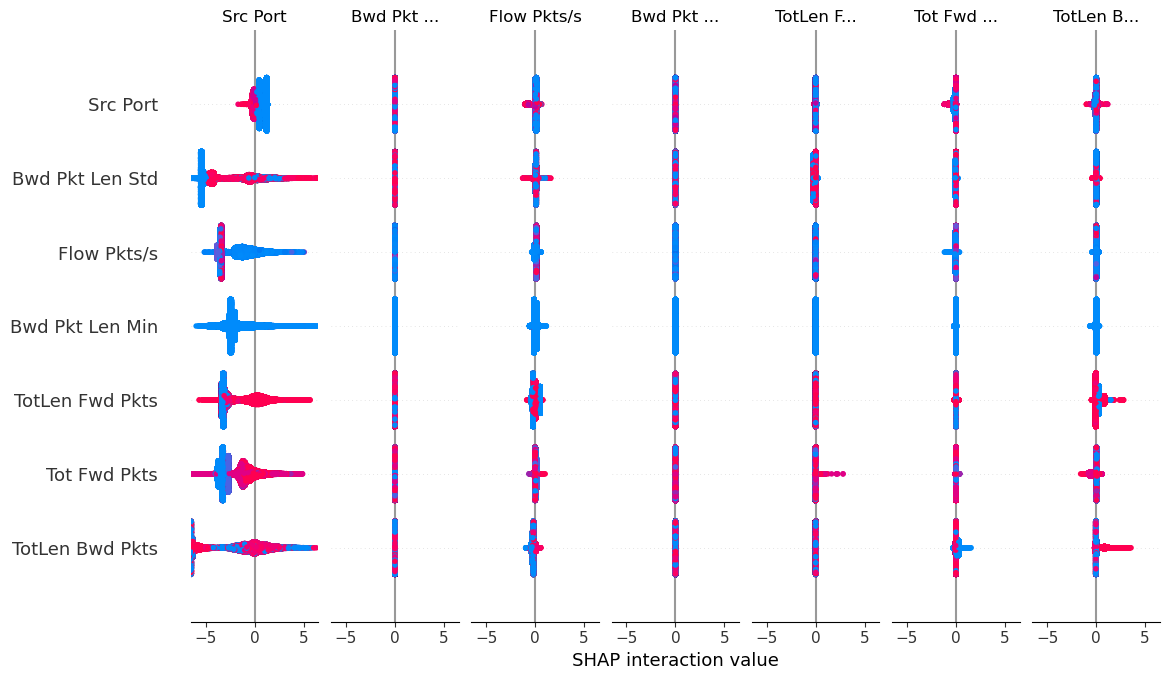

In [9]:
import shap
import joblib
import pandas as pd
import xgboost as xgb

# === Load preprocessed dataset ===
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\preprocessed_dataset_final.csv")
X = df.drop(columns=['Attack_enc'])

# === Load XGBoost model ===
model = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\xgboost_model.pkl")

# === Recalculate SHAP values ===
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# === Plot correct global SHAP summary ===
shap.summary_plot(shap_values, X, feature_names=X.columns, show=True)


In [13]:
import shap
import matplotlib.pyplot as plt

# Step 1: Recalculate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)  # model = your trained XGBoost model
shap_values = explainer(X_scaled)  # X_scaled must match training format

# Step 2: Convert to array format if needed
shap_values_array = shap_values.values  # shape: [num_samples, num_features]


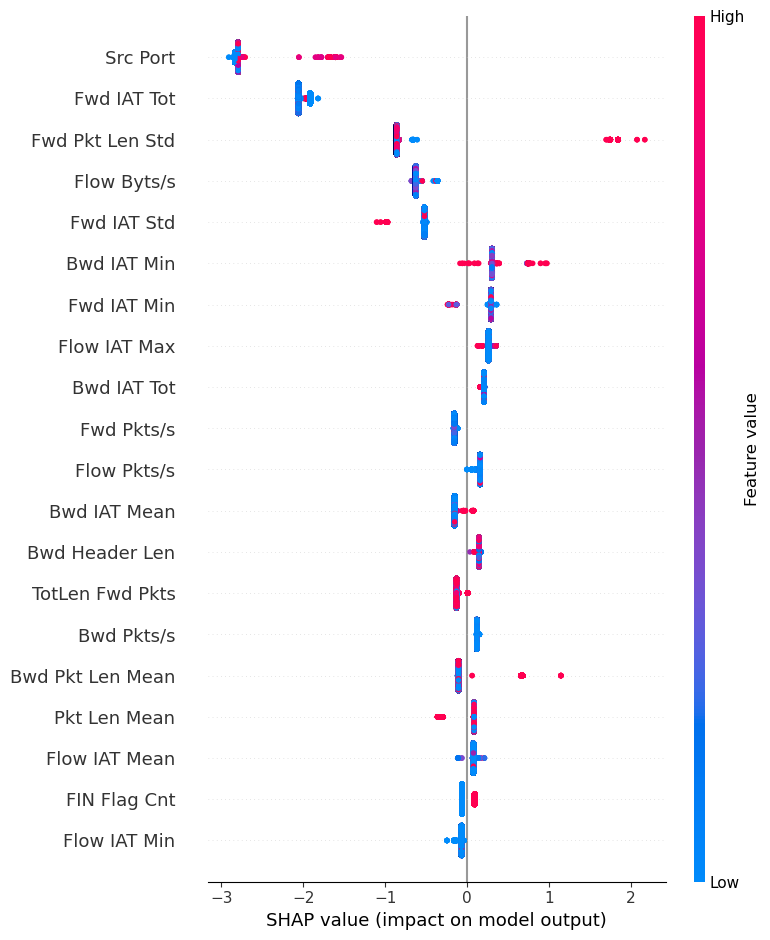

In [14]:
# Now class_index is the actual class number in multiclass setup (0 to 17)
class_index = 14  # e.g. Replay - Complete

# Extract SHAP values for this class
shap_class = shap_values_array[:, :, class_index]  # [samples, features]

# Final plot
shap.summary_plot(
    shap_class,
    X_scaled,
    feature_names=X.columns,
    show=True
)


In [15]:
# Step 1: Generate a Force Plot (single prediction explanation)
import shap

# Load the SHAP explainer again
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_scaled)

# Pick an instance to explain, e.g., the 100th row
index = 100

# Force plot for a single prediction
shap.initjs()
shap.force_plot(
    explainer.expected_value[14],           # expected output for class 14
    shap_values.values[index, :, 14],       # SHAP values for that instance and class
    X_scaled[index, :],                     # the actual feature values
    feature_names=X.columns
)


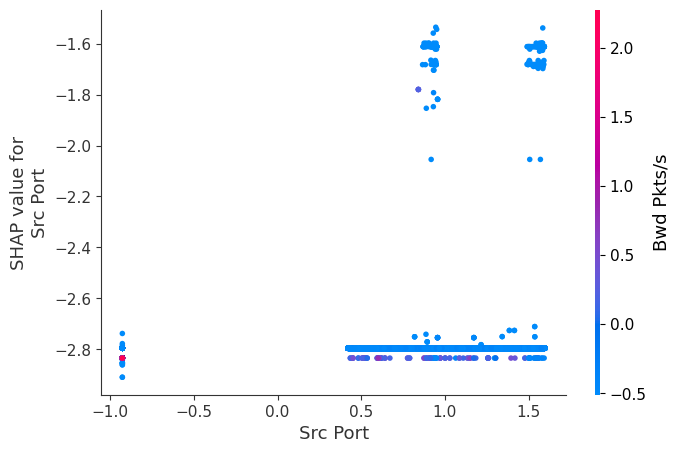

In [16]:
# 📍SHAP dependence plot for 'Src Port'
shap.dependence_plot(
    ind='Src Port',
    shap_values=shap_values_array[:, :, 14],  # class 14 (Replay)
    features=X_scaled,
    feature_names=X.columns
)


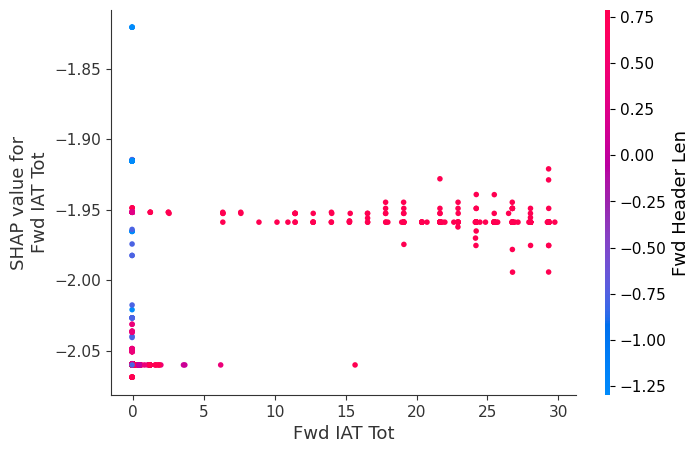

In [17]:
# Top SHAP features – just change this line:
shap.dependence_plot(
    ind='Fwd IAT Tot',                    # <== Change to desired feature
    shap_values=shap_values_array[:, :, 14],  # SHAP values for class 14 (Replay)
    features=X_scaled,
    feature_names=X.columns
)


C:\Users\Administrator\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Administrator\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


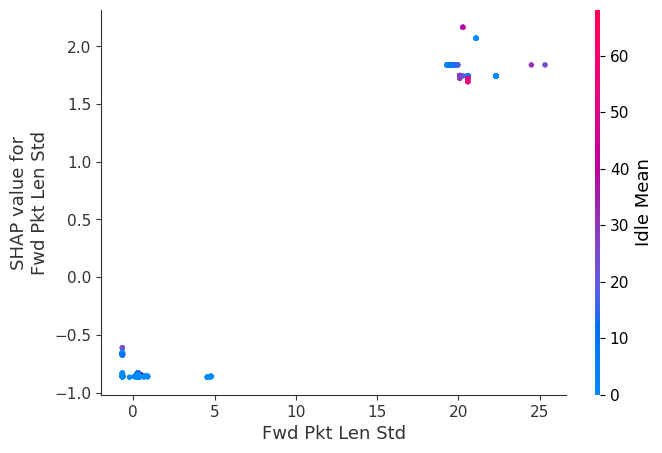

In [18]:
# Top SHAP features – just change this line:
shap.dependence_plot(
    ind='Fwd Pkt Len Std',                    # <== Change to desired feature
    shap_values=shap_values_array[:, :, 14],  # SHAP values for class 14 (Replay)
    features=X_scaled,
    feature_names=X.columns
)


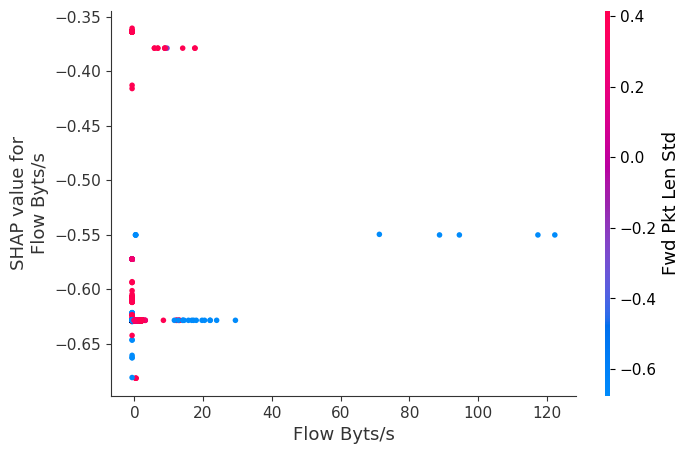

In [19]:
# Top SHAP features – just change this line:
shap.dependence_plot(
    ind='Flow Byts/s',                    # <== Change to desired feature
    shap_values=shap_values_array[:, :, 14],  # SHAP values for class 14 (Replay)
    features=X_scaled,
    feature_names=X.columns
)


C:\Users\Administrator\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Administrator\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


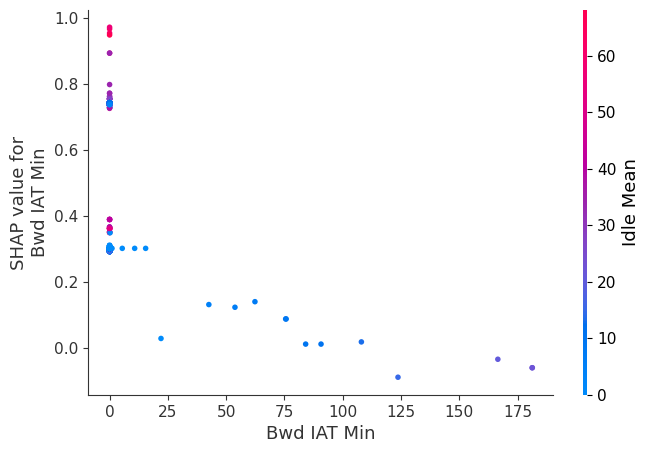

In [20]:
# Top SHAP features – just change this line:
shap.dependence_plot(
    ind='Bwd IAT Min',                    # <== Change to desired feature
    shap_values=shap_values_array[:, :, 14],  # SHAP values for class 14 (Replay)
    features=X_scaled,
    feature_names=X.columns
)


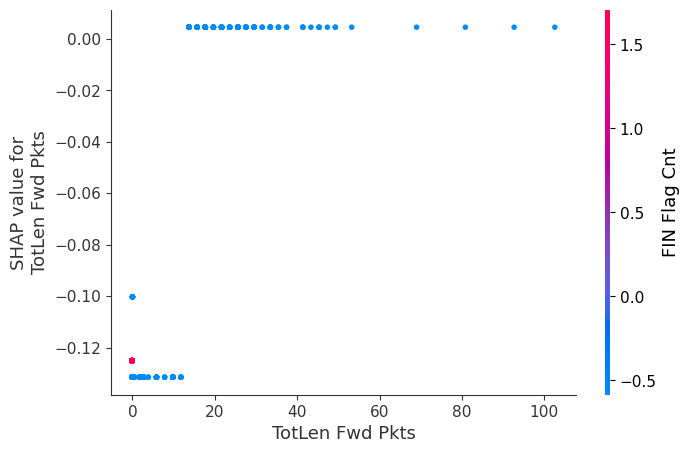

In [22]:
# Top SHAP features – just change this line:
shap.dependence_plot(
    ind='TotLen Fwd Pkts',                    # <== Change to desired feature
    shap_values=shap_values_array[:, :, 14],  # SHAP values for class 14 (Replay)
    features=X_scaled,
    feature_names=X.columns
)